<a href="https://colab.research.google.com/github/ConstantSun/image/blob/master/anime_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip freeze | grep fastai

In [0]:
!pip install patool
import patoolib
import os

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

#YOLO

##Download data for yolo

In [0]:
!gdown https://drive.google.com/uc?id=1GLX5b7WcJCU1WTsq23XT6e4DLJET4T5h


Downloading...
From: https://drive.google.com/uc?id=1GLX5b7WcJCU1WTsq23XT6e4DLJET4T5h
To: /content/darknet.rar
2.55GB [00:32, 77.5MB/s]


In [0]:
path = '/content/darknet.rar'
patoolib.extract_archive(path, outdir=".")

patool: Extracting /content/darknet.rar ...
patool: running /usr/bin/unrar x -- /content/darknet.rar
patool:     with cwd='.'
patool: ... /content/darknet.rar extracted to `.'.


'.'

##Training section - yolo

In [0]:
%cd darknet

/content/darknet


In [0]:
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:228:21: warning: unused variable ‘n’ [-Wunused-variable]
                 int n = _write(client, outputbuf, outlen);
                     ^
gcc -Iinclude/ -I3rdparty/stb/include -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘convolution_2d’:
./src/gemm.c:2016:15: warning: unused variable ‘out_w’ [-Wunused-variable]
     const int out_w = (w + 2 * pad - ksize) / stride + 1;    // output_width=input_width for stride=1

In [0]:
!./darknet detector train data/obj.data yolov3.cfg yolov3.weights 

yolov3
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF

##Test

In [0]:
!./darknet detector map data/obj.data yolov3.cfg yolov3.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

## Interface

In [0]:
import cv2
import numpy as np

In [0]:

labelsPath = '/content/darknet/data/data.names'
LABELS = open(labelsPath).read().strip().split("\n")

weightsPath = "/content/darknet/yolov3.weights"
configPath = "/content/darknet/yolov3.cfg"
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)


In [0]:



#lay output sau khi image chay qua model yolov3
def get_outputlayer(image,net):
    ln = net.getLayerNames()
    ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]

    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),swapRB=True, crop=False)
    net.setInput(blob)
    layerOutputs = net.forward(ln)
    return layerOutputs


def get_boudingbox(image,layerOutputs, confidence_threshold=0.5, threshold=0.3):
    
    boxes = []
    confidences = []
    classIDs = []
    (H, W) = image.shape[:2]
    if len(layerOutputs) == 0:
        return None
    for output in layerOutputs:
        
        for detection in output:
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]

            if confidence > confidence_threshold:
                box = detection[0:4] * np.array([W, H, W, H])
                (centerX, centerY, width, height) = box.astype("int")

                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))

                boxes.append([x, y, int(width), int(height)])
                confidences.append(float(confidence))
                classIDs.append(classID)

                

    idxs = cv2.dnn.NMSBoxes(boxes, confidences, confidence_threshold,threshold)


    bouding_box = []
    if len(idxs) > 0:
        for i in idxs.flatten():
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])
            bouding_box.append([x,y,w,h])
            color = 5
            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
            text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
            cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.5, color, 2)
    return bouding_box,image


In [0]:
path = '/content/Rem_Anime.png'
image = cv2.imread(path,cv2.IMREAD_COLOR)
layer_ouput = get_outputlayer(image,net)
bouding_box,im = get_boudingbox(image,layer_ouput)
cv2.imwrite('/content/result.png',im)

True

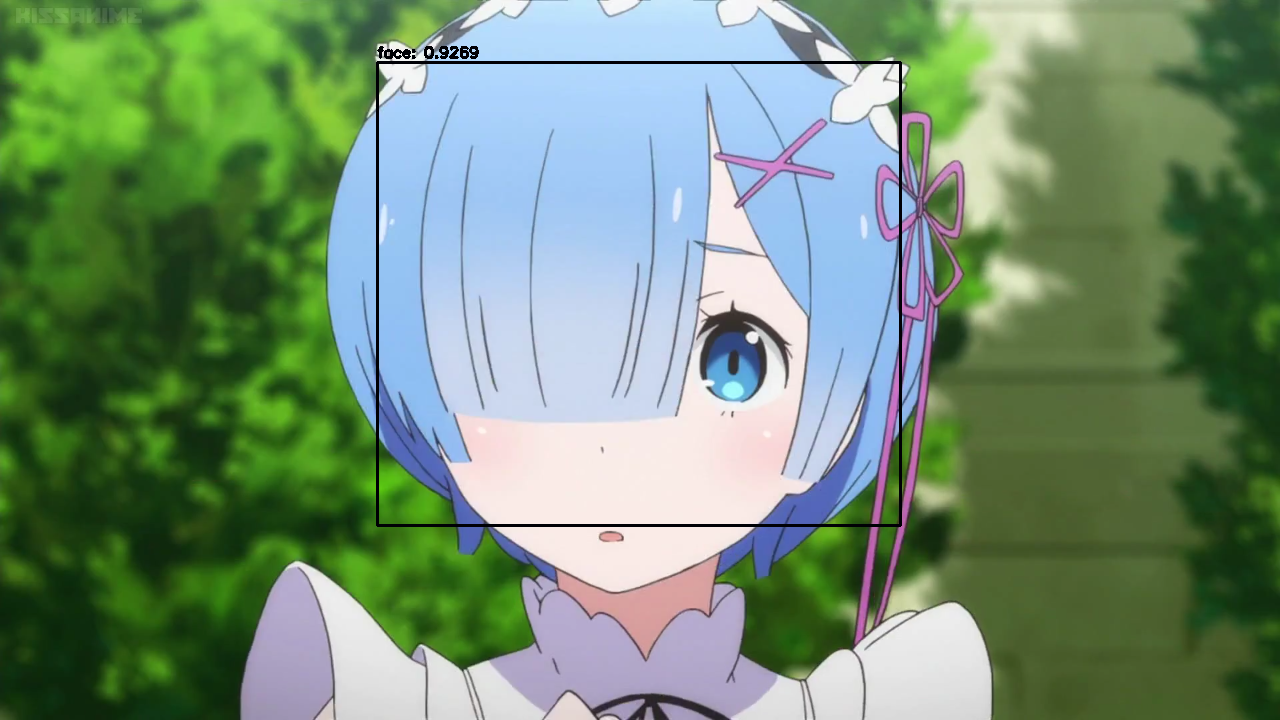

In [0]:
from IPython.display import Image
Image(filename='/content/result.png') 

In [0]:
b = bouding_box[0]
crop =image[b[1]:b[1]+b[3],b[0]:b[0]+b[2]]

In [0]:
cv2.imwrite('/content/face_0.png',crop)

True

#Resnet

In [0]:
from fastai import *
from fastai.vision import *

##Download data for classification

In [0]:
!pip install  "torchvision==0.5.0"

     |████████████████████████████████| 4.0MB 3.0MB/s 
  Using cached https://files.pythonhosted.org/packages/24/19/4804aea17cd136f1705a5e98a00618cb8f6ccc375ad8bfa437408e09d058/torch-1.4.0-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101


In [0]:
!gdown https://drive.google.com/uc?id=1t6vIdHTj9NlqN6M4TqaQnbaN1V9wDoHi

Downloading...
From: https://drive.google.com/uc?id=1t6vIdHTj9NlqN6M4TqaQnbaN1V9wDoHi
To: /content/data_res34_1.zip
14.0GB [05:18, 43.9MB/s]


In [0]:
os.mkdir('/content/data')

In [0]:
path = '/content/data_res34_1.zip'
# path = '/content/drive/My Drive/data_res34.zip'
patoolib.extract_archive(path, outdir="/content/data")

patool: Extracting /content/data_res34_1.zip ...
patool: running /usr/bin/7z x -o/content/data -- /content/data_res34_1.zip
patool: ... /content/data_res34_1.zip extracted to `/content/data'.


'/content/data'

# Training Section - Classification

In [0]:
data_set_path = '/content/data'
data = ImageDataBunch.from_folder(data_set_path, ds_tfms=get_transforms(), size=224,bs=64)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (204772 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Suguha KIRIGAYA ver 2:Sword Art Online,Suguha KIRIGAYA ver 2:Sword Art Online,Suguha KIRIGAYA ver 2:Sword Art Online,Suguha KIRIGAYA ver 2:Sword Art Online,Suguha KIRIGAYA ver 2:Sword Art Online
Path: /content/data;

Valid: LabelList (50856 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Suguha KIRIGAYA ver 2:Sword Art Online,Suguha KIRIGAYA ver 2:Sword Art Online,Suguha KIRIGAYA ver 2:Sword Art Online,Suguha KIRIGAYA ver 2:Sword Art Online,Suguha KIRIGAYA ver 2:Sword Art Online
Path: /content/data;

Test: None

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time


KeyboardInterrupt: ignored

In [0]:
learn.save('model_8')

In [0]:
#load checkpoint
learn.load('model_7')

Learner(data=ImageDataBunch;

Train: LabelList (204772 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Suguha KIRIGAYA ver 2:Sword Art Online,Suguha KIRIGAYA ver 2:Sword Art Online,Suguha KIRIGAYA ver 2:Sword Art Online,Suguha KIRIGAYA ver 2:Sword Art Online,Suguha KIRIGAYA ver 2:Sword Art Online
Path: /content/data;

Valid: LabelList (50856 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Suguha KIRIGAYA ver 2:Sword Art Online,Suguha KIRIGAYA ver 2:Sword Art Online,Suguha KIRIGAYA ver 2:Sword Art Online,Suguha KIRIGAYA ver 2:Sword Art Online,Suguha KIRIGAYA ver 2:Sword Art Online
Path: /content/data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_sta

#Load interface

In [0]:
import torch
import json
from PIL import Image
from torchvision import transforms

In [0]:
with open('data_classes.json','r') as f:
  classes = json.load(f)
  

In [0]:
len(classes)

576

In [0]:
torch.save(learn.model,'/content/model_0.pth')

In [0]:
model = learn.model
model.eval()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [0]:
model = torch.load('model.pth')
model.eval()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [0]:

transform = transforms.Compose([            #[1]
 transforms.Resize(224),                    #[2]
 transforms.ToTensor(),                     #[4]
 transforms.Normalize(                      #[5]
 mean=[0.485, 0.456, 0.406],                #[6]
 std=[0.229, 0.224, 0.225]                  #[7]
 )])


In [0]:
# load image
image_path = '/content/Rem_Anime.png'
img = Image.open(image_path).convert('RGB')


In [0]:
#pass input to model
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0).cuda()
out = model(batch_t)

In [0]:
#get output label
_, index = torch.max(out, 1)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels = data.classes
print(classes[index[0]], percentage[index[0]].item())


Rem:Re - Zero Kara Hajimeru Isekai Seikatsu 99.99809265136719


## Test


In [0]:
from tqdm import tqdm

In [0]:
#get top k 
def get_top_k(out,classes,k=5):
  _, indices = torch.sort(out, descending=True)
  # percentage[idx].item()
  return[classes[idx] for idx in indices[0][:k]]

In [0]:
test_data = '/content/data/valid'
test_size = 0
true_label = 0

for folder in tqdm(os.listdir(test_data)):
  
  imagefolder_path = test_data +'/' + folder
  label = folder
  for image in os.listdir(imagefolder_path):
    image_path = imagefolder_path + '/' + image
    img = Image.open(image_path).convert('RGB')
    img_t = transform(img)
    batch_t = torch.unsqueeze(img_t, 0).cuda()

    out = model(batch_t)

    label_predict = get_top_k(out,classes,1)
    test_size += 1
    if label in label_predict:
      true_label += 1
  
  



  0%|          | 0/576 [00:00<?, ?it/s]

  0%|          | 1/576 [00:02<25:52,  2.70s/it]

  0%|          | 2/576 [00:16<57:16,  5.99s/it]

  1%|          | 3/576 [00:17<42:07,  4.41s/it]

  1%|          | 4/576 [00:18<33:51,  3.55s/it]

  1%|          | 5/576 [00:19<24:44,  2.60s/it]

  1%|          | 6/576 [00:19<17:34,  1.85s/it]

  1%|          | 7/576 [00:19<12:37,  1.33s/it]

  1%|▏         | 8/576 [00:19<09:14,  1.02it/s]

  2%|▏         | 9/576 [00:21<12:51,  1.36s/it]

  2%|▏         | 10/576 [00:22<10:00,  1.06s/it]

  2%|▏         | 11/576 [00:22<08:51,  1.06it/s]

  2%|▏         | 12/576 [00:26<15:47,  1.68s/it]

  2%|▏         | 13/576 [00:26<11:45,  1.25s/it]

  2%|▏         | 14/576 [00:27<12:28,  1.33s/it]

  3%|▎         | 15/576 [00:28<11:54,  1.27s/it]

  3%|▎         | 16/576 [00:33<21:39,  2.32s/it]

  3%|▎         | 17/576 [00:35<21:10,  2.27s/it]

  3%|▎         | 18/576 [00:44<38:45,  4.17s/it]

  3%|▎         | 19/576 [00:56<1:00:33,  6.52s/it]

  3%|▎        

In [0]:
true_label,test_size

(49793, 50856)

In [0]:
#accurancy
true_label/test_size*100

97.90978448953909

In [0]:
test_data = '/content/data/valid'
test_size = 0
true_label = 0

for folder in tqdm(os.listdir(test_data)):
  
  imagefolder_path = test_data +'/' + folder
  label = folder
  for image in os.listdir(imagefolder_path):
    image_path = imagefolder_path + '/' + image
    img = Image.open(image_path).convert('RGB')
    img_t = transform(img)
    batch_t = torch.unsqueeze(img_t, 0).cuda()

    out = model(batch_t)

    label_predict = get_top_k(out,classes,3)
    test_size += 1
    if label in label_predict:
      true_label += 1



  0%|          | 0/576 [00:00<?, ?it/s]

  0%|          | 1/576 [00:02<24:51,  2.59s/it]

  0%|          | 2/576 [00:09<36:07,  3.78s/it]

  1%|          | 3/576 [00:09<26:48,  2.81s/it]

  1%|          | 4/576 [00:10<22:16,  2.34s/it]

  1%|          | 5/576 [00:11<16:21,  1.72s/it]

  1%|          | 7/576 [00:11<11:38,  1.23s/it]

  1%|▏         | 8/576 [00:11<08:27,  1.12it/s]

  2%|▏         | 9/576 [00:12<08:04,  1.17it/s]

  2%|▏         | 10/576 [00:12<06:18,  1.50it/s]

  2%|▏         | 11/576 [00:13<06:01,  1.57it/s]

  2%|▏         | 12/576 [00:15<12:10,  1.30s/it]

  2%|▏         | 13/576 [00:16<09:05,  1.03it/s]

  2%|▏         | 14/576 [00:17<09:34,  1.02s/it]

  3%|▎         | 15/576 [00:17<08:04,  1.16it/s]

  3%|▎         | 16/576 [00:21<16:06,  1.73s/it]

  3%|▎         | 17/576 [00:22<15:24,  1.65s/it]

  3%|▎         | 18/576 [00:28<26:16,  2.82s/it]

  3%|▎         | 19/576 [00:36<41:30,  4.47s/it]

  3%|▎         | 20/576 [00:36<29:24,  3.17s/it]

  4%|▎         

In [0]:
true_label/test_size*100

99.58903570866761